# 1- Load the data and inspect it

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-10-08 07:25:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   265MB/s    in 1.9s    

2022-10-08 07:25:23 (265 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile
zip = zipfile.ZipFile("10_food_classes_all_data.zip")
zip.extractall()

In [ ]:
# inspect the data 
import os
for path,dirs ,imgs in os.walk("10_food_classes_all_data"):
  print(f"there are {len(imgs)} images and {len(dirs)} folders in {path}")

there are 0 images and 2 folders in 10_food_classes_all_data
there are 0 images and 10 folders in 10_food_classes_all_data/test
there are 250 images and 0 folders in 10_food_classes_all_data/test/chicken_wings
there are 250 images and 0 folders in 10_food_classes_all_data/test/steak
there are 250 images and 0 folders in 10_food_classes_all_data/test/hamburger
there are 250 images and 0 folders in 10_food_classes_all_data/test/fried_rice
there are 250 images and 0 folders in 10_food_classes_all_data/test/ice_cream
there are 250 images and 0 folders in 10_food_classes_all_data/test/chicken_curry
there are 250 images and 0 folders in 10_food_classes_all_data/test/ramen
there are 250 images and 0 folders in 10_food_classes_all_data/test/sushi
there are 250 images and 0 folders in 10_food_classes_all_data/test/grilled_salmon
there are 250 images and 0 folders in 10_food_classes_all_data/test/pizza
there are 0 images and 10 folders in 10_food_classes_all_data/train
there are 750 images and 0

In [ ]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [ ]:
def view_random_images(target_dir, target_class):
  ''' visualise random images from our dataset '''
  # creating a list of targeted class images 
  images_list = os.listdir("10_food_classes_all_data/{}/{}".format(target_dir,target_class))
  # choose a random image 
  rand_image = random.sample(images_list,1)[0]
  #plot the images
  img = mpimg.imread("10_food_classes_all_data/{}/{}/{}".format(target_dir,target_class,rand_image))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print("the shape of the image is{}".format(img.shape))


  return img

In [ ]:
#make a list of food classes
import pathlib
for name in pathlib.Path("10_food_classes_all_data/train").glob("*"):
  print(name.name)

classes = [item.name for item in pathlib.Path("10_food_classes_all_data/train").glob("*")]


chicken_wings
steak
hamburger
fried_rice
ice_cream
chicken_curry
ramen
sushi
grilled_salmon
pizza


the shape of the image is(512, 382, 3)


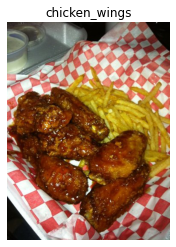

In [ ]:
# visualise again and again
img = view_random_images("train", random.sample(classes,1)[0])

# 2- preprocess the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
# create a train data generator
traingen = ImageDataGenerator(rescale=1/255) 
testgen = ImageDataGenerator(rescale=1/255) 

In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
train_data = traingen.flow_from_directory( train_dir,
                                          target_size=(224,224),
                                          batch_size =32,
                                          shuffle = False  )

Found 7500 images belonging to 10 classes.


In [ ]:
valid_data = testgen.flow_from_directory( test_dir,
                                          target_size=(224,224),
                                          batch_size =32,
                                          shuffle = False  )

Found 2500 images belonging to 10 classes.


# 3- create a baseline model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 1- create the baseline model
model1 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")

])

In [ ]:
# 2- compile model

model1.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics="accuracy"
)


In [ ]:
#3-fit model
history = model1.fit(train_data,
                     epochs = 5,
                     steps_per_epoch = len(train_data),
                     validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
235/235 [==============================] - 54s 185ms/step - loss: 2.3129 - accuracy: 0.0781 - val_loss: 2.2987 - val_accuracy: 0.1244
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 2.3015 - accuracy: 0.1235 - val_loss: 2.2544 - val_accuracy: 0.1452
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 2.2410 - accuracy: 0.1585 - val_loss: 2.2732 - val_accuracy: 0.1604
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 2.1830 - accuracy: 0.2115 - val_loss: 2.2560 - val_accuracy: 0.1756
Epoch 5/5
235/235 [==============================] - 46s 194ms/step - loss: 2.0414 - accuracy: 0.2679 - val_loss: 2.2681 - val_accuracy: 0.1948


## train with shuffled data


In [ ]:
train_data = traingen.flow_from_directory( train_dir,
                                          target_size=(224,224),
                                          batch_size =32,
                                          shuffle = True  )

Found 7500 images belonging to 10 classes.


In [ ]:
history1 = model1.fit(train_data,
                     epochs = 5,
                     steps_per_epoch = len(train_data),
                     validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 1.7595 - accuracy: 0.3809 - val_loss: 2.3617 - val_accuracy: 0.2032
Epoch 2/5
235/235 [==============================] - 44s 185ms/step - loss: 1.4097 - accuracy: 0.5200 - val_loss: 2.6452 - val_accuracy: 0.2012
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 1.0491 - accuracy: 0.6481 - val_loss: 3.1271 - val_accuracy: 0.2124
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.7425 - accuracy: 0.7568 - val_loss: 4.2000 - val_accuracy: 0.2068
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 0.5193 - accuracy: 0.8332 - val_loss: 4.8230 - val_accuracy: 0.1940


# 5- evaluate the model

In [ ]:
model1.evaluate(valid_data)

79/79 [==============================] - 11s 138ms/step - loss: 4.8230 - accuracy: 0.1940


[4.822990417480469, 0.1940000057220459]

In [ ]:
import pandas as pd
pd.DataFrame(history.history).columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [ ]:
def loss_accuracy(history):
  """ a func to visulaise the loss and accuracy graphs"""
  df = pd.DataFrame(history.history)
  df[["loss", "val_loss"]].plot()
  df[["accuracy", "val_accuracy"]].plot()



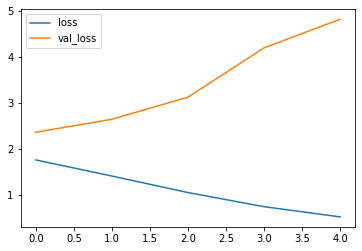

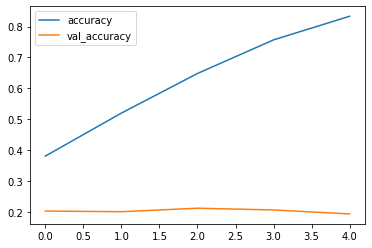

In [ ]:
loss_accuracy(history1)

it seems that our model is **overfitting** the train dataset and perform badly on test dataset

# 6- Adjust model hyperparameters to beat baseline and reduce overfitting

In [ ]:
#exprement 1 more simple model just with 2 Conv layers
model2 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")

])
model2.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics="accuracy"
)

history2 = model1.fit(train_data,
                     epochs = 5,
                     steps_per_epoch = len(train_data),
                     validation_data = valid_data,
                    validation_steps = len(valid_data))


Epoch 1/5
235/235 [==============================] - 46s 197ms/step - loss: 0.3626 - accuracy: 0.8848 - val_loss: 5.9072 - val_accuracy: 0.2068
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 0.2541 - accuracy: 0.9236 - val_loss: 6.7383 - val_accuracy: 0.2004
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 0.1954 - accuracy: 0.9416 - val_loss: 7.8220 - val_accuracy: 0.2084
Epoch 4/5
235/235 [==============================] - 47s 198ms/step - loss: 0.1491 - accuracy: 0.9588 - val_loss: 8.5039 - val_accuracy: 0.1952
Epoch 5/5
235/235 [==============================] - 46s 198ms/step - loss: 0.1537 - accuracy: 0.9584 - val_loss: 9.2259 - val_accuracy: 0.1932


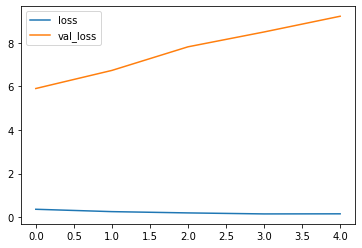

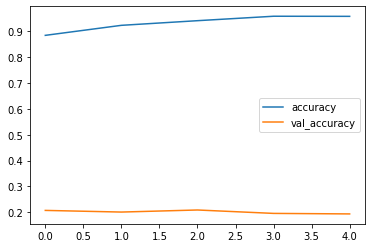

In [ ]:
loss_accuracy(history2)

In [ ]:
# create an image generator
train_augment_gen = ImageDataGenerator( rescale=1/255, rotation_range= 0.2, zoom_range= 0.2,
                              shear_range=0.2, height_shift_range = 0.2, horizontal_flip =True, width_shift_range=0.2)

In [ ]:
train_data_augmented = train_augment_gen.flow_from_directory( train_dir,
                                          target_size=(224,224),
                                          batch_size =32,
                                          shuffle = True  )

Found 7500 images belonging to 10 classes.


In [ ]:
#exprement 2 , data augmaentation
model3 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
     Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")

])
model3.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics="accuracy"
)

history3 = model1.fit(train_data_augmented,
                     epochs = 5,
                     steps_per_epoch = len(train_data),
                     validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
235/235 [==============================] - 106s 450ms/step - loss: 2.5592 - accuracy: 0.1197 - val_loss: 2.3124 - val_accuracy: 0.1184
Epoch 2/5
235/235 [==============================] - 106s 449ms/step - loss: 2.3082 - accuracy: 0.1076 - val_loss: 2.3034 - val_accuracy: 0.1148
Epoch 3/5
235/235 [==============================] - 112s 477ms/step - loss: 2.3054 - accuracy: 0.1027 - val_loss: 2.3018 - val_accuracy: 0.1168
Epoch 4/5
235/235 [==============================] - 105s 446ms/step - loss: 2.3030 - accuracy: 0.1076 - val_loss: 2.3022 - val_accuracy: 0.1128
Epoch 5/5
235/235 [==============================] - 104s 444ms/step - loss: 2.3022 - accuracy: 0.1091 - val_loss: 2.3009 - val_accuracy: 0.1184


# 7- Repeat until satisfied

# Prediction

In [ ]:
def plot_images(train, train_augmented):
  rand1 = random.randint(0,len(train))
  rand2 = random.randint(0,32)

  images , labels1 = train[rand1]
  images_aug , labels2 = train_augmented[rand1]
  #ploting
  plt.subplot(1,2,1)
  plt.imshow(images[rand2])
  plt.title("image not augmented")

  plt.subplot(1,2,2)
  plt.imshow(images_aug[rand2])
  plt.title("image augmented")

In [ ]:
train_data_augmented == train_data

True